In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np

from PIL import Image
import glob
from collections import defaultdict
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
IMG_SIZE = (64,64)
def pixels_from_path(file_path):
    im = Image.open(file_path)
    im = im.resize(IMG_SIZE)
    np_im = np.array(im)
    #matrix of pixel RGB values
    return np_im

In [3]:
glob.glob('data1/train/*')

['data1/train\\cat', 'data1/train\\hen']

In [4]:
shape_counts = defaultdict(int)
for i, cat in enumerate(glob.glob('data1/train/cat/*')[:1000]):
    if i%100==0:
        print(i)
    img_shape = pixels_from_path(cat).shape
    shape_counts[str(img_shape)]= shape_counts[str(img_shape)]+ 1

for i, cat in enumerate(glob.glob('data1/train/hen/*')[:1000]):
    if i%100==0:
        print(i)
    img_shape = pixels_from_path(cat).shape
    shape_counts[str(img_shape)]= shape_counts[str(img_shape)]+ 1

0
100
0
100


In [5]:
shape_items = list(shape_counts.items())
shape_items.sort(key = lambda x: x[1])
shape_items.reverse()

In [6]:
len(glob.glob('data1/train/cat/*'))

152

In [7]:
len(glob.glob('data1/train/hen/*'))

152

In [8]:
pixels_from_path(glob.glob('data1/train/cat/*')[5]).shape

(64, 64, 3)

In [9]:
pixels_from_path(glob.glob('data1/train/hen/*')[5]).shape

(64, 64, 3)

In [10]:
SAMPLE_SIZE = 152
#print("loading trainin cat images...")
#cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/home/apiiit-rkv/Desktop/tot/tottrain/horse/*')[:SAMPLE_SIZE]])
print("loading training cat images...")
cat_train_set = np.asarray([pixels_from_path(cat) for dog in glob.glob('data1/train/cat/*')[:SAMPLE_SIZE]])

loading training cat images...


In [11]:
SAMPLE_SIZE = 152
#print("loading trainin cat images...")
#cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/home/apiiit-rkv/Desktop/tot/tottrain/horse/*')[:SAMPLE_SIZE]])
print("loading training hen images...")
hen_train_set = np.asarray([pixels_from_path(hen) for hen in glob.glob('data1/train/hen/*')[:SAMPLE_SIZE]])

loading training hen images...


In [12]:
valid_size = 38
print("loading validation cat images...")
cat_valid_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('data1/validation/cat/*')[-valid_size:]])


loading validation cat images...


In [13]:
valid_size = 38
print("loading validation hen images...")
hen_valid_set = np.asarray([pixels_from_path(hen) for hen in glob.glob('data1/validation/hen/*')[-valid_size:]])

loading validation hen images...


In [14]:
x_train = np.concatenate([cat_train_set, hen_train_set])
labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])
#labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)])
print(labels_train.shape)

(304,)


In [15]:
x_valid = np.concatenate([cat_valid_set, hen_valid_set])
labels_valid = np.asarray([1 for _ in range(valid_size)]+[0 for _ in range(valid_size)])
print(labels_valid.shape)

(76,)


In [16]:
x_valid.shape

(76, 64, 64, 3)

In [17]:
x_train.shape

(304, 64, 64, 3)

In [18]:
labels_train.shape

(304,)

In [19]:
labels_valid.shape

(76,)

In [20]:
# 10% of the data will automatically be used for validation
validation_size = 0.1
img_size = IMG_SIZE # resize images to be 374x500 (most common shape)
num_channels = 3 # RGB
sample_size = 8192 #We'll use 8192 pictures (2**13)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

total_pixels = img_size[0] *img_size[1] * 3
fc_size = 512

inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
x = layers.Flatten(name = 'flattened_img')(inputs) #turn image to vector.

x = layers.Dense(fc_size, activation='relu', name='first_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='class')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#model2=Sequential()
input_shape=(64,64,3)
import tensorflow as tf
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2)
    # Flatten the results to feed into a DNN
    #tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    #tf.keras.layers.Dense(1, activation='sigmoid')  
])


In [41]:
shape_counts = defaultdict(int)
for i, cat in enumerate(glob.glob('data1/train1/dog/*')[:1000]):
    if i%100==0:
        print(i)
    img_shape = pixels_from_path(cat).shape
    shape_counts[str(img_shape)]= shape_counts[str(img_shape)]+ 1
    
shape_counts = defaultdict(int)
for i, cat in enumerate(glob.glob('data1/train1/elephant/*')[:1000]):
    if i%100==0:
        print(i)
    img_shape = pixels_from_path(cat).shape
    shape_counts[str(img_shape)]= shape_counts[str(img_shape)]+ 1

0
100
0
100


In [42]:
shape_items = list(shape_counts.items())
shape_items.sort(key = lambda x: x[1])
shape_items.reverse()

In [43]:
validation_size = 0.1
img_size = IMG_SIZE # resize images to be 374x500 (most common shape)
num_channels = 3 # RGB
sample_size = 8192 

In [44]:
len(glob.glob('data1/train1/dog/*'))

152

In [45]:
len(glob.glob('data1/train1/elephant/*'))

152

In [46]:
pixels_from_path(glob.glob('data1/train1/dog/*')[5]).shape

(64, 64, 3)

In [47]:
pixels_from_path(glob.glob('data1/train1/elephant/*')[5]).shape

(64, 64, 3)

In [48]:
SAMPLE_SIZE = 152
#print("loading trainin cat images...")
#cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/home/apiiit-rkv/Desktop/tot/tottrain/horse/*')[:SAMPLE_SIZE]])
print("loading training dog images...")
dog_train_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('data1/train1/dog/*')[:SAMPLE_SIZE]])

loading training dog images...


In [49]:
SAMPLE_SIZE = 152
#print("loading trainin cat images...")
#cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/home/apiiit-rkv/Desktop/tot/tottrain/horse/*')[:SAMPLE_SIZE]])
print("loading training elephant images...")
elephant_train_set = np.asarray([pixels_from_path(elephant) for elephant in glob.glob('data1/train1/elephant/*')[:SAMPLE_SIZE]])

loading training elephant images...


In [50]:
valid_size = 38
print("loading validation dog images...")
dog_valid_set = np.asarray([pixels_from_path(horse) for horse in glob.glob('data1/validation1/dog/*')[-valid_size:]])


loading validation dog images...


In [51]:
valid_size = 38
print("loading validation elephant images...")
elephant_valid_set = np.asarray([pixels_from_path(elephant) for elephant in glob.glob('data1/validation1/elephant/*')[-valid_size:]])


loading validation elephant images...


In [52]:
x_train1 = np.concatenate([dog_train_set, elephant_train_set])
labels_train1 = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])
#labels_train1 = np.asarray([0 for _ in range(SAMPLE_SIZE)])
print(labels_train1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [53]:
x_train1.shape

(304, 64, 64, 3)

In [54]:
x_valid1 = np.concatenate([ dog_valid_set, elephant_valid_set])
labels_valid1 = np.asarray([1 for _ in range(valid_size)]+[0 for _ in range(valid_size)])
print(labels_valid1.shape)
print(labels_valid1)

(76,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [55]:
x_valid.shape

(76, 64, 64, 3)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#model1=Sequential()
import tensorflow as tf
input_shape=(64,64,3)
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2)
])


In [57]:
import keras
print(keras.__version__)
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

2.3.1


Using TensorFlow backend.


In [58]:
model_concat = concatenate([model1.output, model2.output], axis=-1)

In [59]:
model_concat= Flatten()(model_concat)
model_concat = Dense(2, activation='softmax')(model_concat)
model = Model(inputs=[model1.input, model2.input], outputs=model_concat)

In [60]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_16_input (InputLayer)    [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_12_input (InputLayer)    [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 62, 62, 16)   448         conv2d_16_input[0][0]            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 62, 62, 16)   448         conv2d_12_input[0][0]            
____________________________________________________________________________________________

In [62]:
print(labels_train)
print(labels_valid)
print(labels_train1)
print(labels_valid1)
print(len(labels_train))
print(len(labels_valid))
print(len(labels_train1))
print(len(labels_valid1))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 

In [63]:
SAMPLE_SIZE=152
labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])
print(labels_train.shape)
print(labels_train)

(304,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [64]:
labels_train.shape

(304,)

In [65]:
SAMPLE_SIZE=38
labels_valid = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])
print(labels_valid)

print(labels_valid.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
(76,)


In [66]:
epoch=10
history = model.fit([x_train,x_train1],
                    [labels_train],
                    shuffle = True, #important since we loaded cats first, dogs second.
                    epochs=10,
                    validation_data=([x_valid,x_valid1], 
                                     [labels_valid]))


Train on 304 samples, validate on 76 samples
Epoch 1/10
304/304 [==============================] - 3s 11ms/sample - loss: 15.1057 - accuracy: 0.6283 - val_loss: 2.9387 - val_accuracy: 0.5526
Epoch 2/10
304/304 [==============================] - 1s 3ms/sample - loss: 0.1873 - accuracy: 0.9638 - val_loss: 13.4330 - val_accuracy: 0.5000
Epoch 3/10
304/304 [==============================] - 1s 3ms/sample - loss: 0.0458 - accuracy: 0.9967 - val_loss: 14.8621 - val_accuracy: 0.5000
Epoch 4/10
304/304 [==============================] - 1s 3ms/sample - loss: 0.0235 - accuracy: 0.9934 - val_loss: 11.9384 - val_accuracy: 0.5000
Epoch 5/10
304/304 [==============================] - 1s 3ms/sample - loss: 0.0491 - accuracy: 0.9967 - val_loss: 12.9713 - val_accuracy: 0.5000
Epoch 6/10
304/304 [==============================] - 1s 3ms/sample - loss: 0.0292 - accuracy: 0.9967 - val_loss: 14.1013 - val_accuracy: 0.5000
Epoch 7/10
304/304 [==============================] - 1s 3ms/sample - loss: 0.0093 -

In [50]:
import cv2
imgcat = cv2.imread('data1/train/cat/cat.27.jpg') 
imgdog = cv2.imread('data1/train1/dog/dog.2330.jpg')

In [51]:
imgcat  = cv2.resize(imgcat, (64, 64))
fin = np.float32(imgcat).reshape(1, 64, 64, 3)
imgdog  = cv2.resize(imgdog, (64, 64))
fin1 = np.float32(imgdog).reshape(1, 64, 64, 3)

In [52]:
prediction=model.predict([fin, fin1], batch_size=None,steps=1)
prediction

array([[1.000000e+00, 6.870954e-12]], dtype=float32)

In [53]:
#imgcat=cv2.resize(imgcat,(64,64))
#imgcat=np.float32(imgcat).reshape(1,64,64,3)
#imgdog=cv2.resize(imgdog,(64,64))
#imgdog=np.float32(imgdog).reshape(1,64,64,3)
#images=([imgcat,imgdog])

In [54]:
#prediction=model.predict([imgcat,imgdog],steps=1)
#prediction

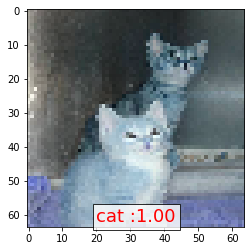

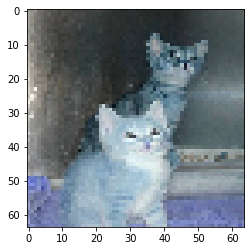

In [55]:
import matplotlib.pyplot as plt
if(prediction[:,:]>0.5).any():
    value ='cat :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='dog :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(imgcat)
plt.show()
plt.imshow(imgcat)
plt.show()